In [1]:
from sheap.spectra_readers import parallel_reader 
from sheap.MainSheap import Sheapectral 
from sheap.RegionHandler.RegionBuilder import RegionBuilder
from sheap.RegionHandler.RegionFitting import RegionFitting
from sheap.ploting import *

#### We have to add the posibility of have 4 parameters _ at least for the emission, narrow and bals? 

In [2]:
import jax 
from jax import jit 
import jax.numpy as jnp
import numpy as np 
import glob 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle 
jax.config.update("jax_enable_x64", True)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
pickles = glob.glob("images/pickles/*")
dict_ = {}
for i in pickles:
    with open(i, "rb") as file:
        flux_dict = pickle.load(file)
        dict_.update(flux_dict)

In [5]:
hbeta_band = np.array([list(dict_[key].values()) for key in dict_.keys() if "vis" in key and "G" not in key])
hbeta_band[:,0,:] /= (1+0.77)
#5600,7300
#4400, 5600
masK= (hbeta_band[0,0,:]>4400) & (hbeta_band[0,0,:]<5400 )
indics = np.where(masK)[0]
hbeta_band = hbeta_band[:, :, indics]

test_clase = Sheapectral(hbeta_band,z=0)
z_s=test_clase.z
norm_factor=10**test_clase.spectra_exp
Spectra = test_clase.spectra

Warning SHEAP works with arrays (n,3,X); if your array is (n,2,X) it will add an array equal to 1% of signal
Warning no coords define the code will not correct for extinction


Assuming same redsfhit for all the objects 


In [6]:
halpha_band = np.array([list(dict_[key].values()) for key in dict_.keys() if "nir" in key and "G" not in key])
halpha_band[:,0,:] /= (1+0.77)
#5600,7300
#4400, 5600
masK= (halpha_band[0,0,:]>5800) & (halpha_band[0,0,:]<7300)
indics = np.where(masK)[0]
halpha_band = halpha_band[:, :, indics]

test_clase = Sheapectral(halpha_band,z=0)
z_s=test_clase.z
norm_factor=10**test_clase.spectra_exp
Spectra = test_clase.spectra

Warning SHEAP works with arrays (n,3,X); if your array is (n,2,X) it will add an array equal to 1% of signal
Warning no coords define the code will not correct for extinction


Assuming same redsfhit for all the objects 


In [7]:
max(halpha_band[0][0])

np.float64(7299.999999998468)

- region.make_region(verbose=True,Fe_regions=[],force_linear=False,n_broad = 2,n_narrow=2 ,narrow_plus=False,add_out_flow=True,tied_narrow_to="OIIIc") #,weighted=True

In [6]:
region = RegionBuilder(4400,5400)
region.make_region(verbose=True,Fe_regions=[],force_linear=True,n_broad = 2,n_narrow=2 ,narrow_plus=True,add_out_flow=True) 

In [7]:
region = RegionBuilder(4400,5400)
region.make_region(verbose=True,Fe_regions=[],force_linear=False,n_broad = 2,n_narrow=2 ,narrow_plus=False,add_out_flow=True,tied_narrow_to="OIIIc") 

In [8]:
#pd.DataFrame(region.regions_to_fit)

In [9]:
clase = RegionFitting(region.to_complex(add_free=True,free_Fe=False))
clase(Spectra,num_steps=2000,weighted=False)

We assume a local linear continuum
Runing: tied_params_step_1
learning_rate: 0.1
optimizer: adabelief
num_steps: 2000
Runing: tied_params_step_2
We assume a local linear continuum
learning_rate: 0.01
optimizer: adabelief
num_steps: 4000


In [129]:
pandas_loc = pd.DataFrame(clase.params,columns=list(clase.params_dict.keys()))

In [140]:
pandas_loc[[col for col in pandas_loc.columns if "center" in col and ("Hbeta" in col) and "broad" in col]].values  - pandas_loc[[col for col in pandas_loc.columns if "center" in col and ("Hbeta" in col) and "broad" in col]].values[:,1,None] 

array([[-52.3610614 ,   0.        ],
       [-52.78638285,   0.        ],
       [-54.10934212,   0.        ],
       [ 57.67382789,   0.        ]])

In [ ]:
#6539.2292576832015 - 6099.755566701118

-53.31556670111877

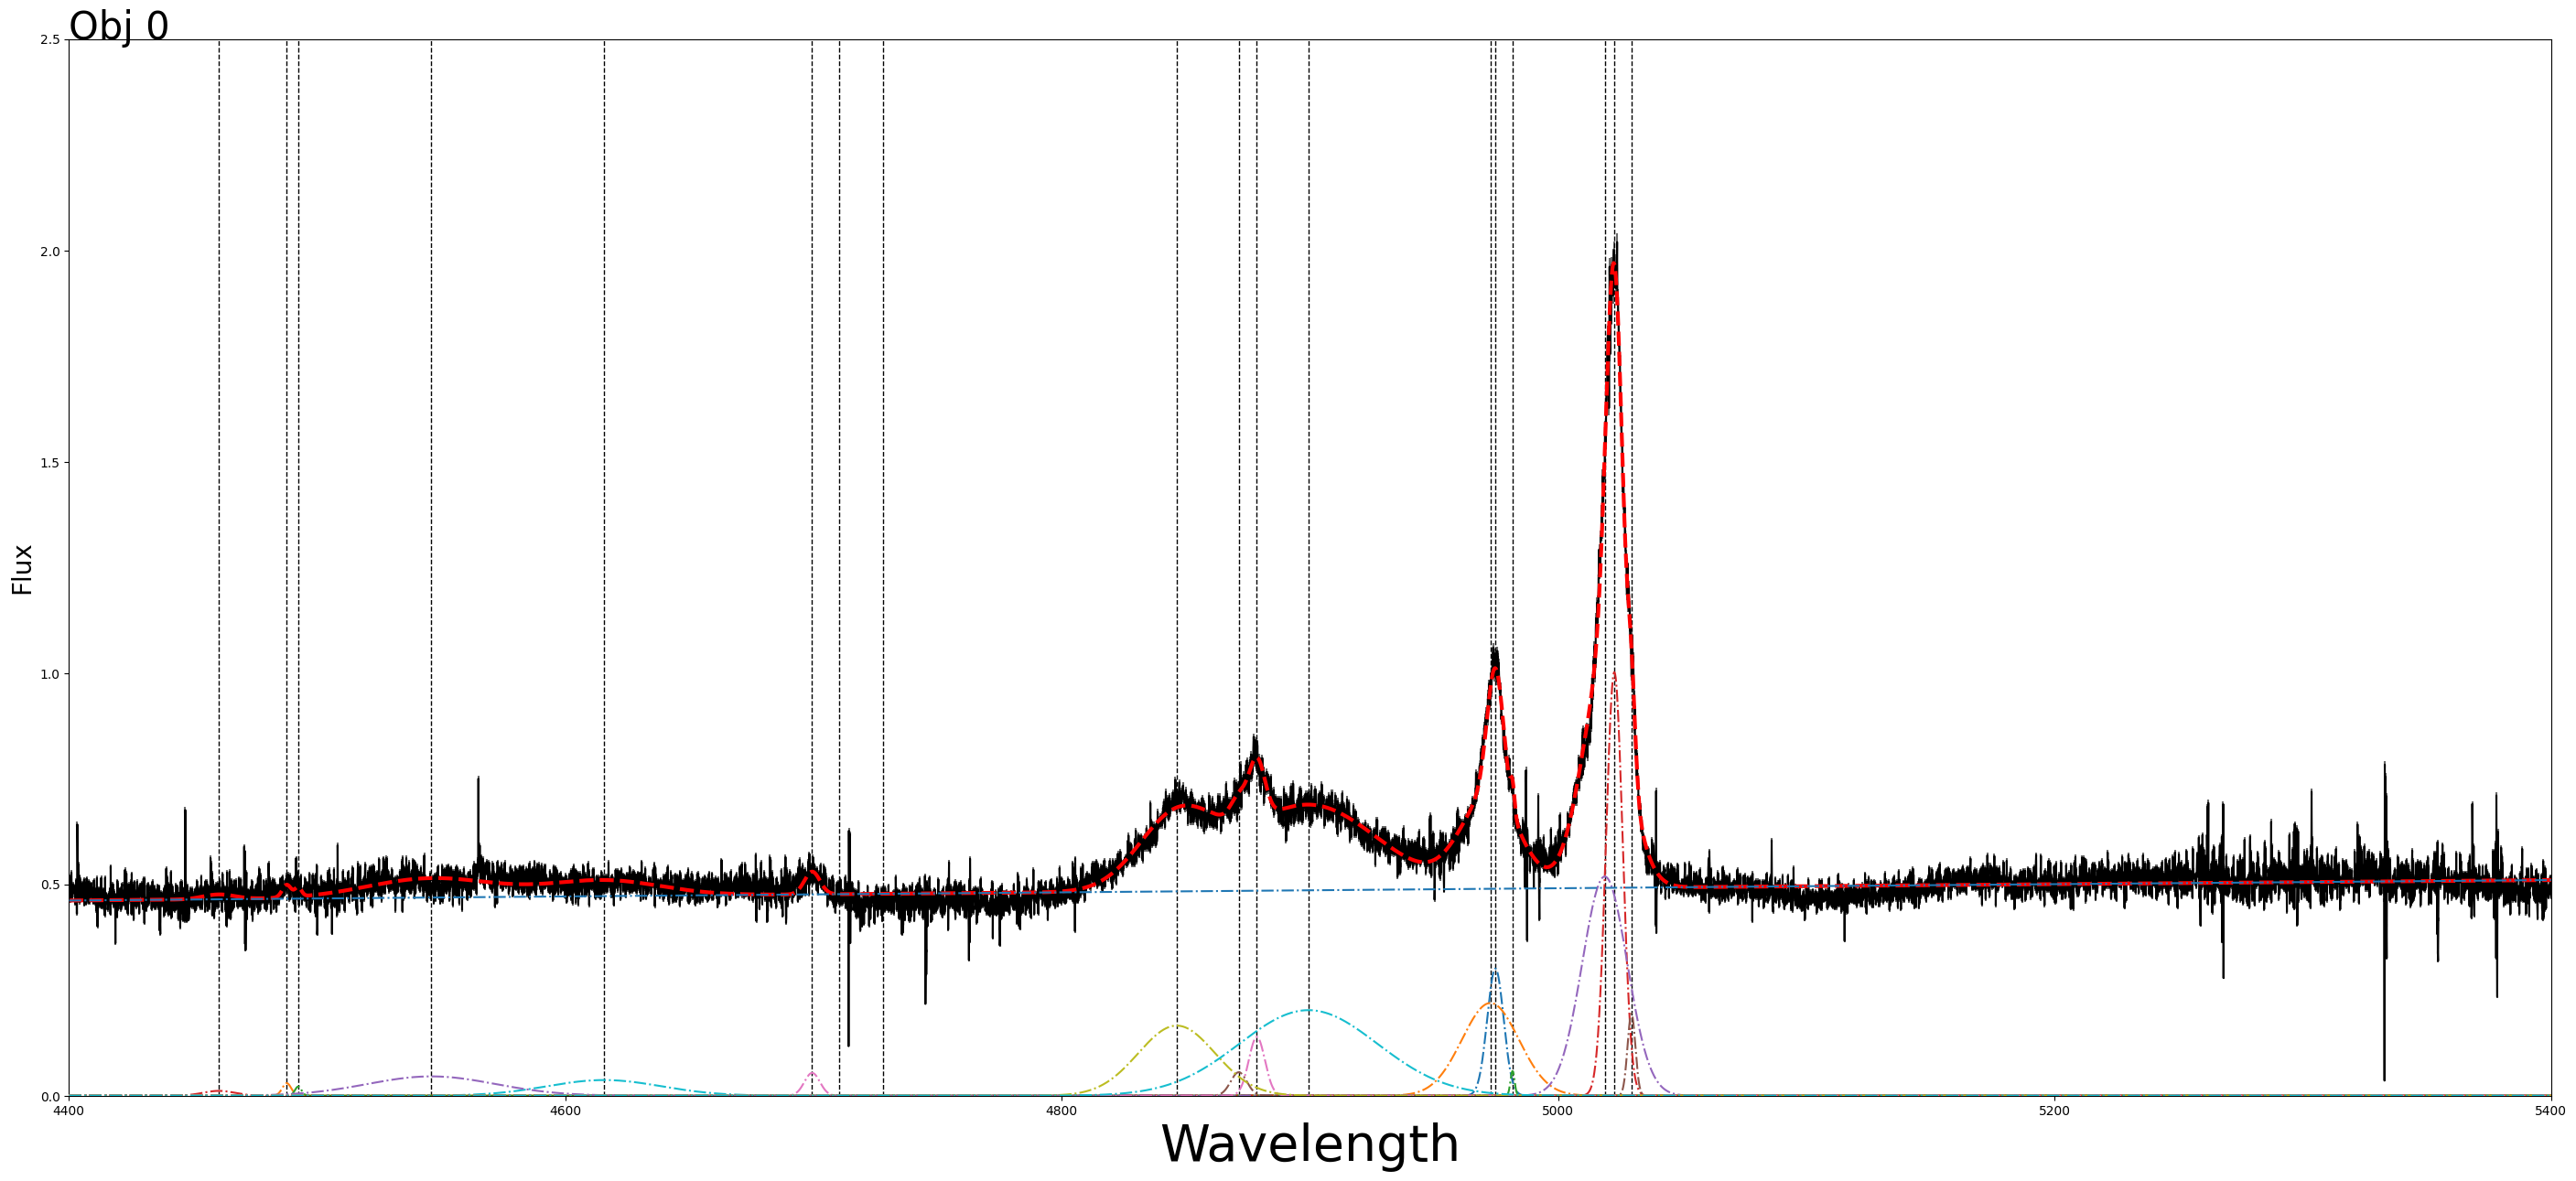

In [10]:
region_plot = SheapRegionplot(clase)
region_plot.plot(0,xlim=[4400,5400],ylim=[0,2.5],add_name=False,residual=False)#207

In [114]:
#pandas_loc = pd.DataFrame(clase.params,columns=list(clase.params_dict.keys()))

In [115]:
#clase.params_dict

In [116]:
#clase.initial_params[40] 

In [117]:
from sheap.tools.others import wl_to_kms

In [ ]:
2. * jnp.sqrt(2. * jnp.log(2.)) * self.sigma

In [80]:
wl_to_kms(pandas_loc[[col for col in pandas_loc.columns if "width" in col and "III" in col and "b" in col and "outflow" in col]].values,clase.initial_params[40] )

Array([[300.],
       [300.],
       [300.],
       [300.]], dtype=float64)

In [ ]:
#(pandas_loc[[col for col in pandas_loc.columns if "width" in col and "III" in col and "b" in col]].values)/

array([[3.30821936, 2.76555408],
       [3.30821936, 3.30821936],
       [0.82705484, 3.30821936],
       [3.30821936, 3.30821936]])

Runing: tied_params_step_1
learning_rate: 0.1
optimizer: adabelief
num_steps: 2000
Runing: tied_params_step_2
We assume a local linear continuum
learning_rate: 0.01
optimizer: adabelief
num_steps: 4000


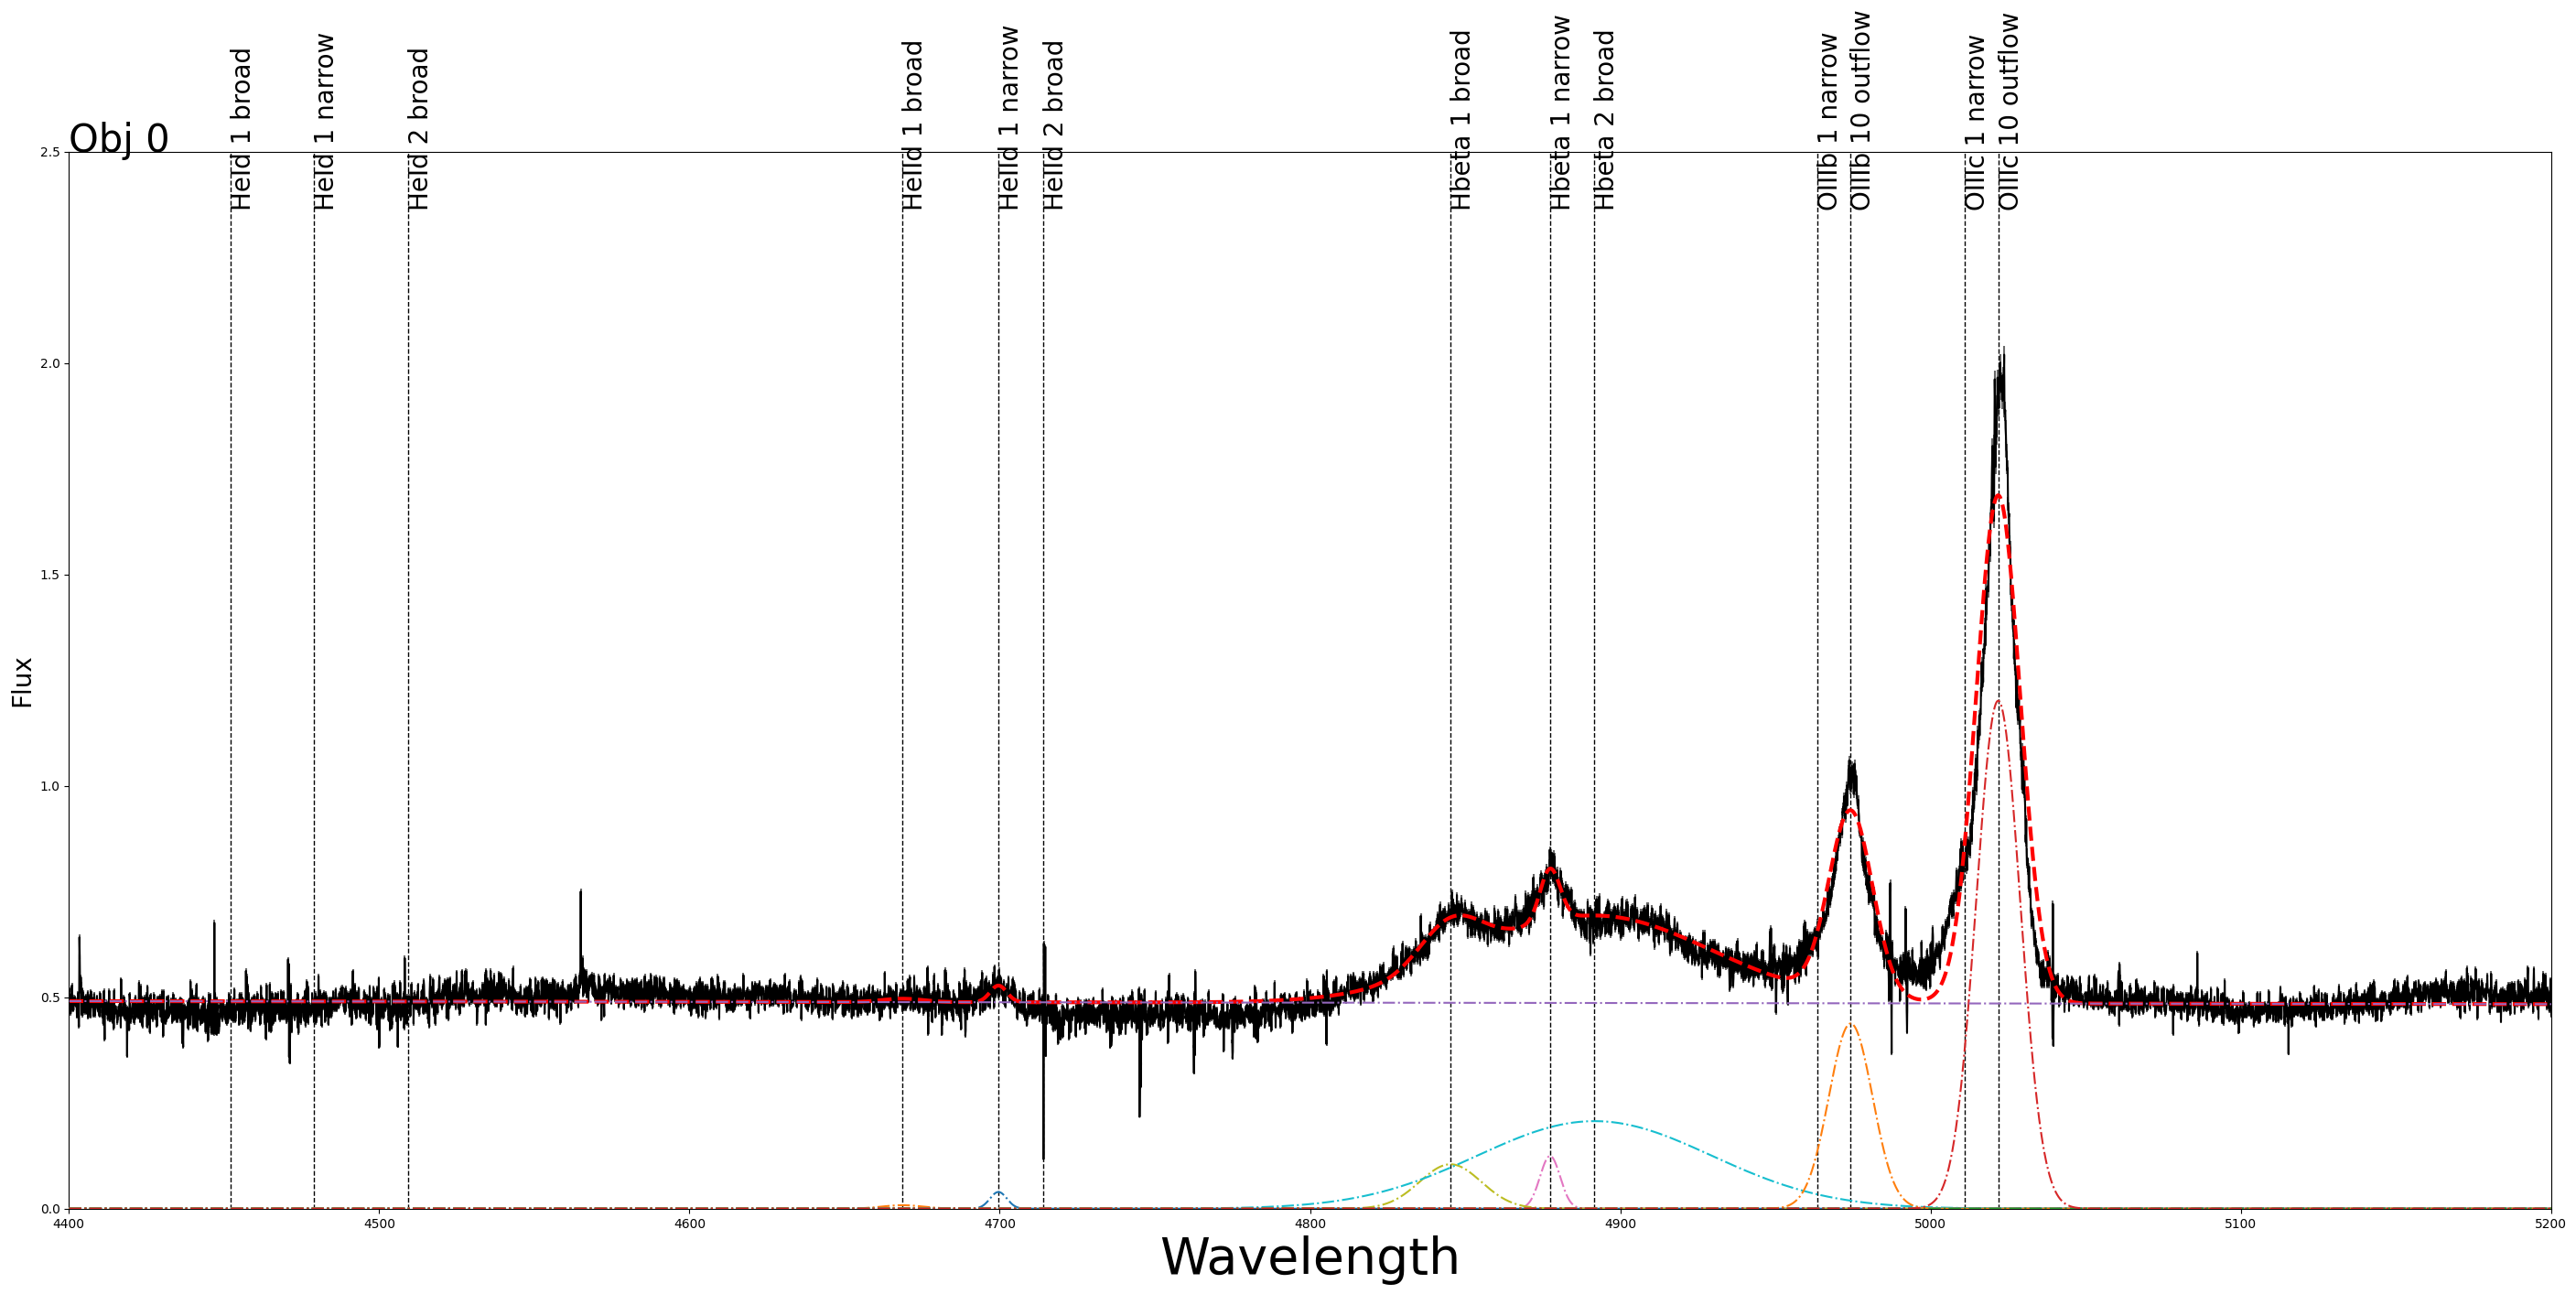

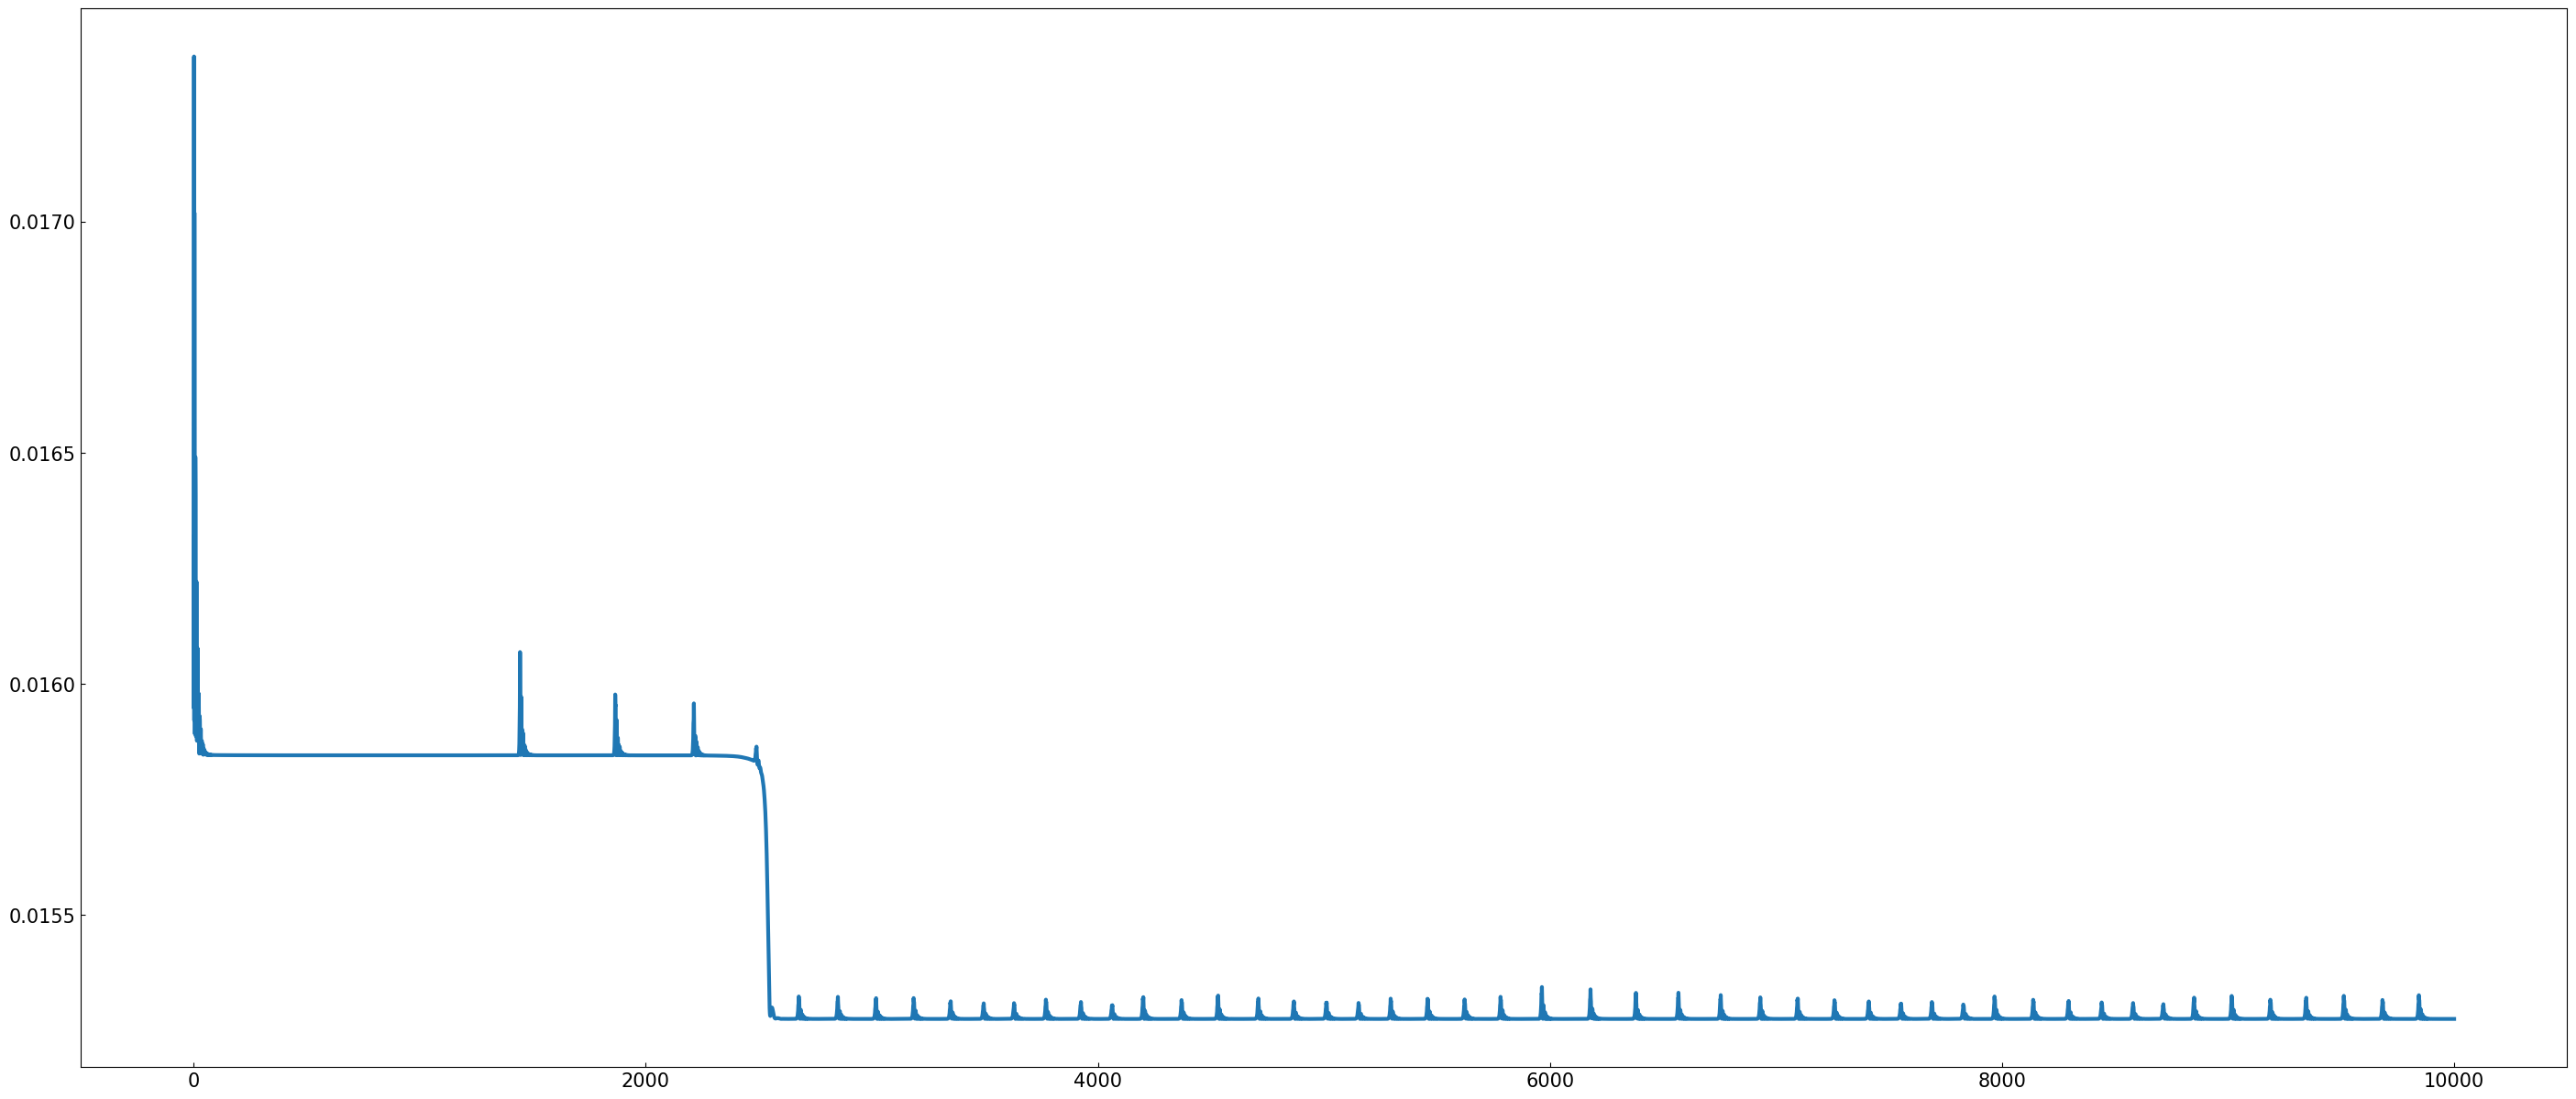

In [183]:
plt.plot(jnp.array(Hbeta_class.loss).T[3])

In [133]:
from SHEAP.fitting.functions import linear

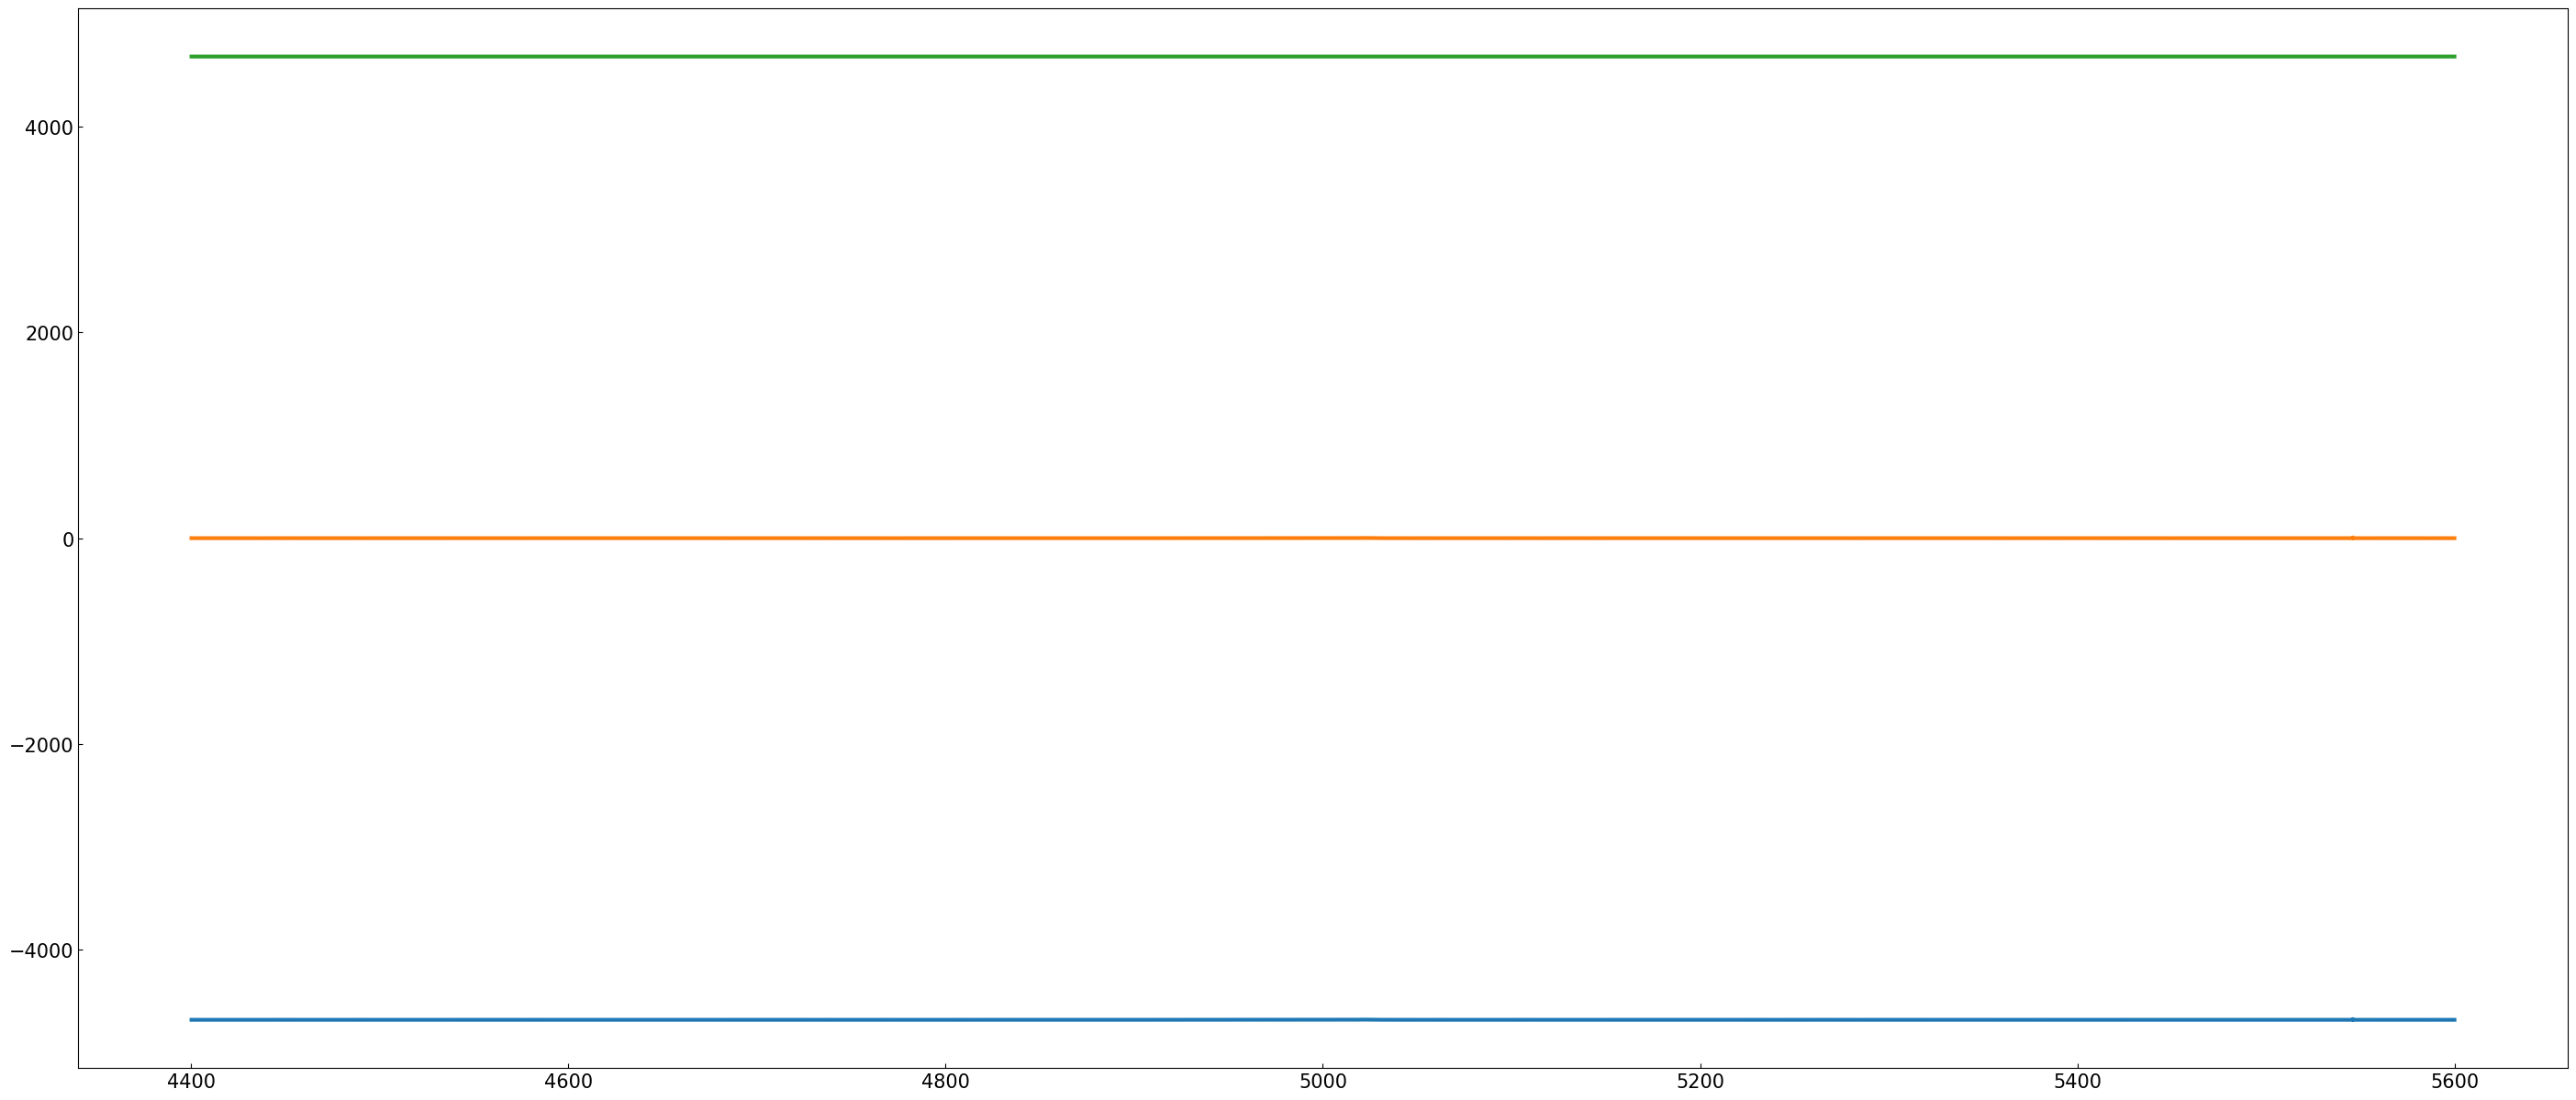

In [202]:
n = 3
plt.plot(Spectra[n,0,:],Spectra[n,1,:]-linear(Spectra[n,0,:],Hbeta_class.params[n]))
plt.plot(Spectra[n,0,:],Spectra[n,1,:])
plt.plot(Spectra[n,0,:],linear(Spectra[n,0,:],Hbeta_class.params[n]))

In [178]:
Hbeta_class.params.shape

(4, 35)

In [179]:
Hbeta_class.params[3]

Array([1.92298516e+00, 4.69987712e+03, 3.12596923e+00, 4.05196944e+00,
       4.88497768e+03, 4.19408970e+01, 4.05196944e+00, 4.88497768e+03,
       4.19408970e+01, 3.07196110e-01, 4.49156296e+03, 1.23003538e+00,
       5.66310653e-01, 4.58723745e+03, 5.12581083e+01, 5.66310653e-01,
       4.58723745e+03, 5.12581083e+01, 3.29325639e+00, 4.87741182e+03,
       3.24313229e+00, 2.41357852e+01, 5.02027891e+03, 8.58060756e+00,
       8.88162028e+00, 4.97379848e+03, 1.10073050e+01, 9.92966105e+00,
       4.97450273e+03, 3.30821936e+00, 3.30988702e+01, 5.02283312e+03,
       3.34017965e+00, 1.63717006e-01, 1.36526883e+01], dtype=float64)

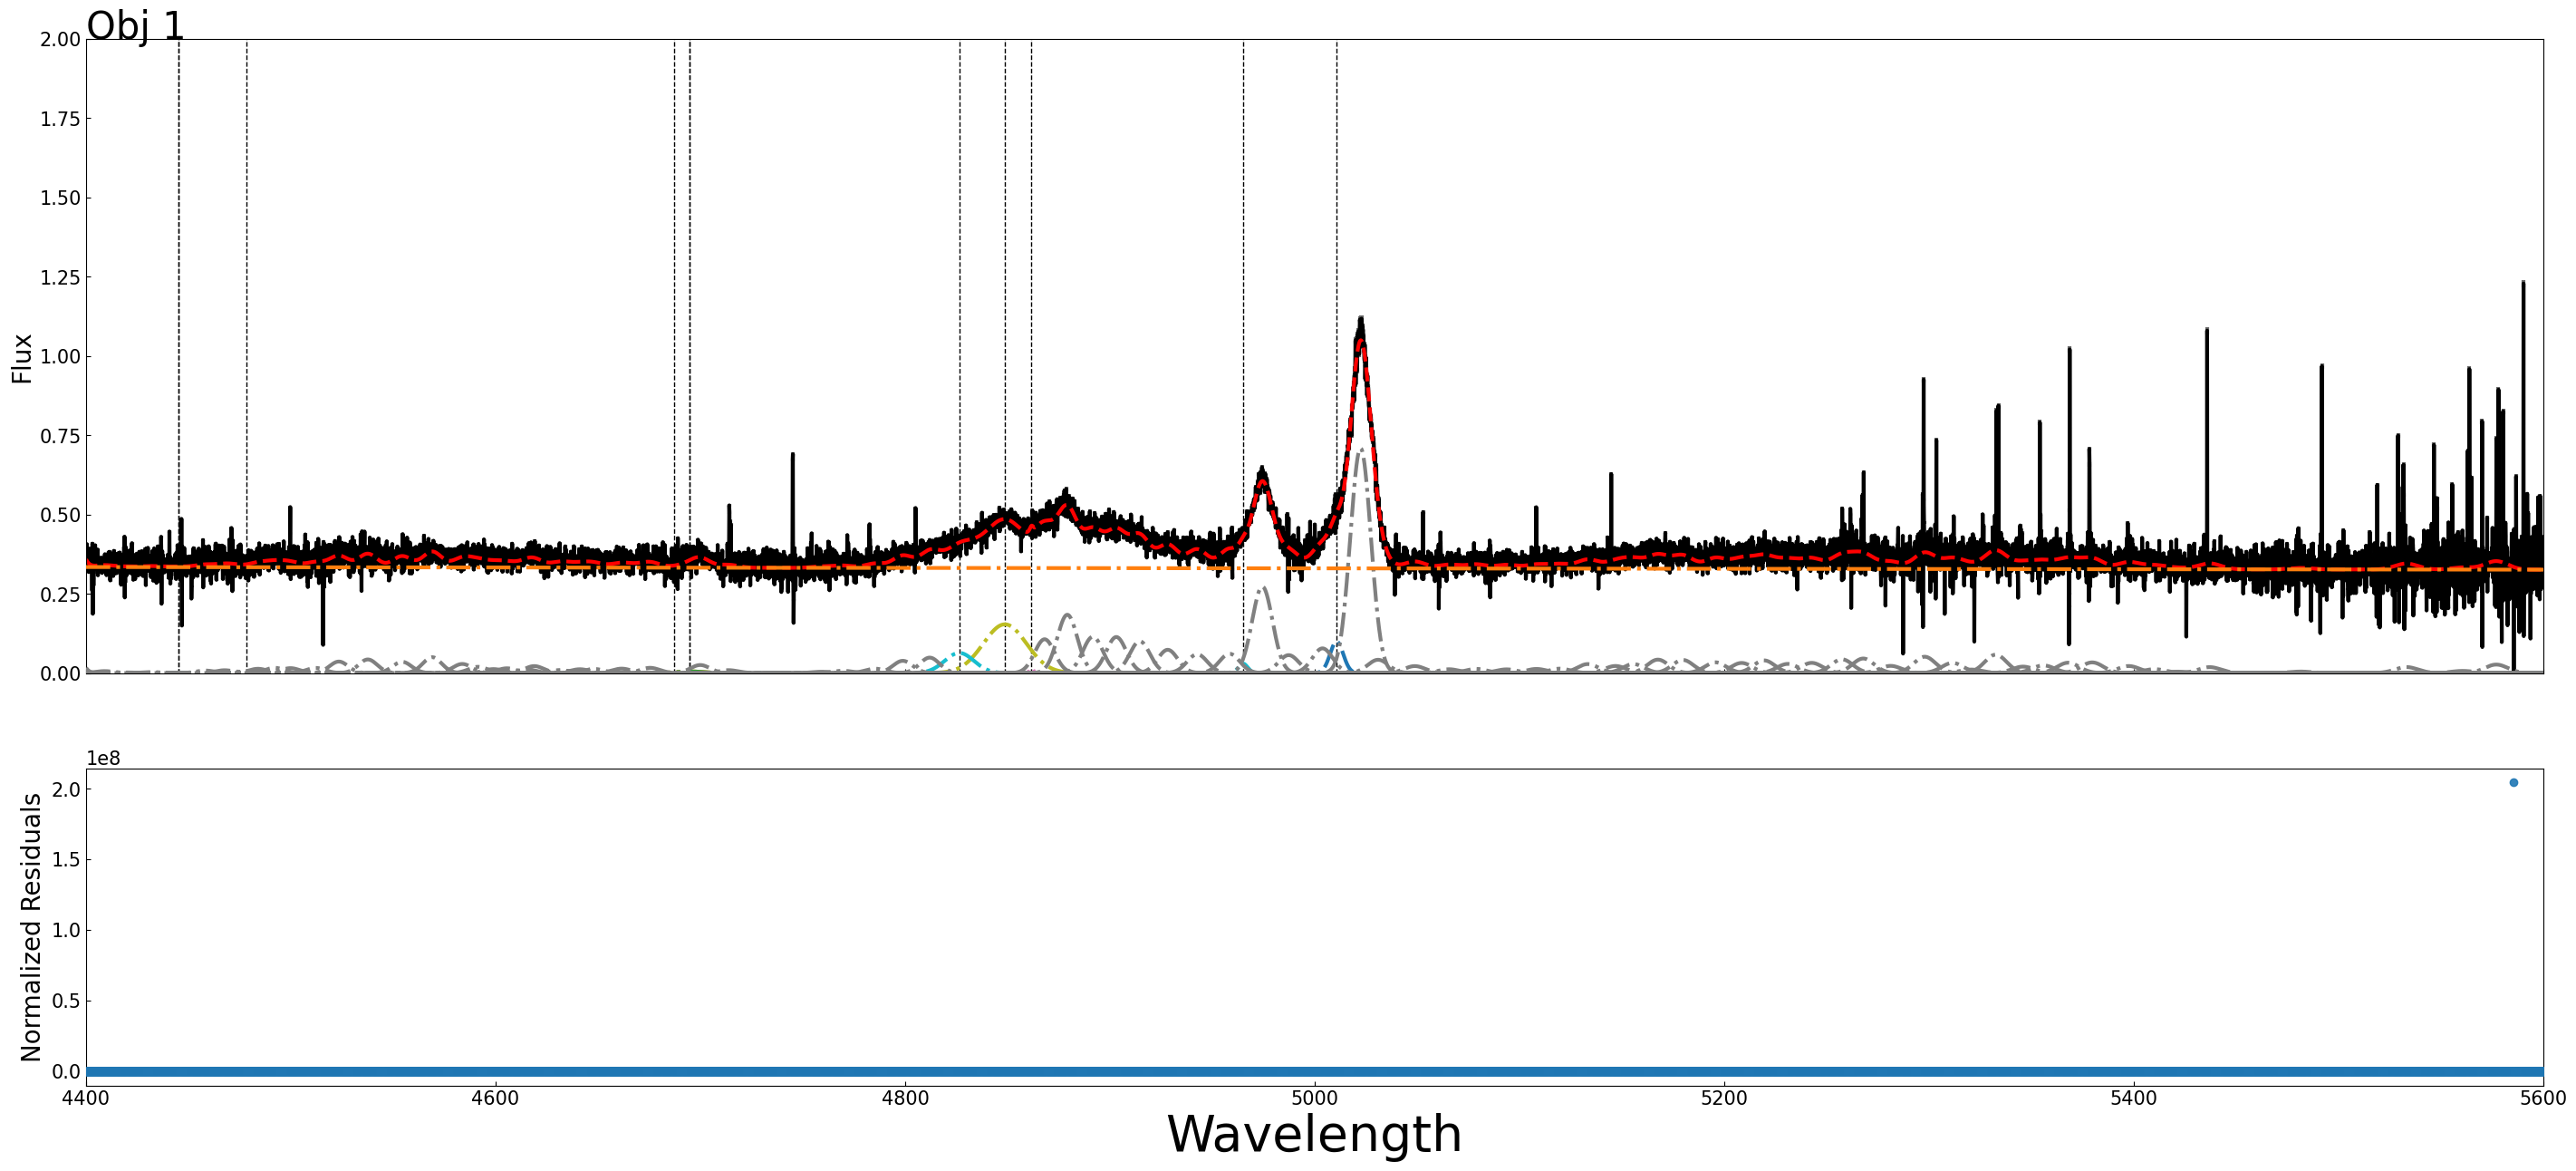